<a href="https://colab.research.google.com/github/uheilsel/repository/blob/master/%E2%80%9CSEP767_final_project_ipynb%E2%80%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
import seaborn
import pandas as pd
import sklearn.model_selection
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from datetime import datetime as dt
import time
import numpy as np
import keras

In [ ]:
import seaborn
import csv
import pandas as pd
import sklearn.model_selection
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
import statistics as stat
import seaborn
from sklearn.metrics import r2_score

In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/new_colab.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,11,12,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
dataset=dataset.drop(['url','id'],axis=1)

In [ ]:
dataset['floor']=dataset.floor.str.extract(pat='(\d+)')

In [ ]:
col_value=dataset.columns.values
for h in range(len(dataset.index)):
  dataset.at[h,'tradeTime']=dataset.at[h,'tradeTime'][0:4]+dataset.at[h,'tradeTime'][5:7]

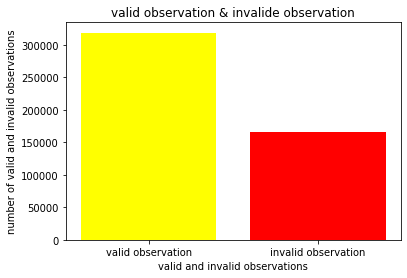

In [ ]:
for i in col_value:
  dataset[i]=dataset[i].fillna("")

invalid_obs=[]

for i in range(dataset.shape[0]):
    for j in col_value: 
        if dataset.at[i, j]=='':
          if i not in invalid_obs:
            invalid_obs.append(i)
          
for x in range(dataset.shape[0]):
    for y in col_value:
      if dataset.at[x,y]=='Î´Öª':
        if x not in invalid_obs:
          invalid_obs.append(x)

name_array = np.array(['valid observation', 'invalid observation'])
weight_array = [len(dataset.index), len(invalid_obs)]
plt.xlabel('valid and invalid observations')
plt.ylabel('number of valid and invalid observations')
plt.bar(range(len(weight_array)), weight_array,color=['yellow', 'red'],tick_label=name_array)
plt.title('valid observation & invalide observation')
plt.show()

invalid_obs.sort()

dataset = dataset.drop(labels=invalid_obs, axis=0)

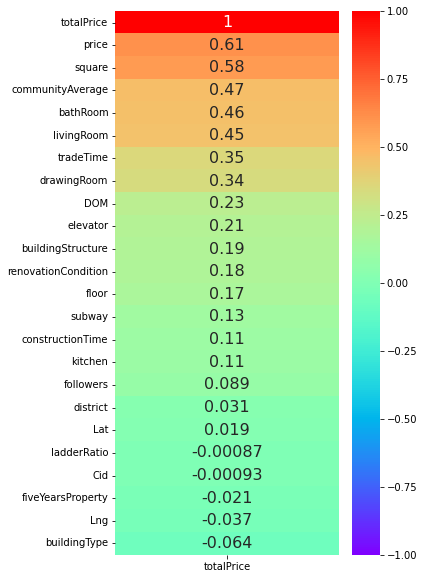

In [ ]:
for n in col_value:
  dataset[n] = dataset[n].astype(float)

top_features = dataset.corr()[['totalPrice']].sort_values(by=['totalPrice'],ascending=False)
plt.figure(figsize=(5,10))
seaborn.heatmap(top_features,cmap='rainbow',annot=True,annot_kws={"size": 16},vmin=-1)

In [ ]:
dataset=dataset.drop(['Lng','Lat'],axis=1)

In [ ]:
dataset.describe()

,Cid,tradeTime,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
count,1.522660e+05,152266.000000,152266.000000,152266.000000,152266.000000,152266.000000,152266.000000,152266.000000,152266.000000,152266.000000,...,152266.000000,152266.000000,152266.000000,152266.000000,1.522660e+05,152266.000000,152266.000000,152266.000000,152266.000000,152266.000000
mean,1.139283e+12,201578.108645,29.432789,26.909803,410.905238,51769.837705,82.484276,2.010876,1.144753,0.991640,...,3.037428,1999.395610,3.019610,4.441950,6.611798e+01,0.575309,0.611286,0.597185,6.691848,63319.669979
std,1.812332e+12,129.796723,50.372756,44.398808,253.622889,24163.276811,36.479193,0.771432,0.508481,0.116663,...,1.260005,8.990568,1.142767,1.905362,2.565113e+04,0.494298,0.487460,0.490466,2.842577,22215.723477
min,1.111027e+12,201001.000000,1.000000,0.000000,0.100000,1.000000,7.370000,0.000000,0.000000,0.000000,...,1.000000,1950.000000,1.000000,1.000000,1.400000e-02,0.000000,0.000000,0.000000,1.000000,10847.000000
25%,1.111027e+12,201510.000000,1.000000,2.000000,248.000000,34166.250000,57.750000,1.000000,1.000000,1.000000,...,1.000000,1994.000000,3.000000,2.000000,2.500000e-01,0.000000,0.000000,0.000000,6.000000,46035.000000
50%,1.111027e+12,201608.000000,7.000000,12.000000,355.000000,47094.000000,73.460000,2.000000,1.000000,1.000000,...,4.000000,2002.000000,3.000000,6.000000,3.330000e-01,1.000000,1.000000,1.000000,7.000000,58947.500000
75%,1.111027e+12,201701.000000,38.000000,33.000000,502.225000,64884.750000,97.520000,2.000000,1.000000,1.000000,...,4.000000,2006.000000,4.000000,6.000000,5.000000e-01,1.000000,1.000000,1.000000,8.000000,75604.000000
max,1.184867e+14,201801.000000,1677.000000,1143.000000,4900.000000,150000.000000,640.000000,7.000000,5.000000,3.000000,...,4.000000,2016.000000,4.000000,6.000000,1.000940e+07,1.000000,1.000000,1.000000,13.000000,183109.000000


In [ ]:
dataset.to_csv('/content/drive/MyDrive/new_pre_process.csv')

In [ ]:
dataset_1=pd.read_csv('/content/drive/MyDrive/new_pre_process.csv')
dataset_1=dataset_1.drop(['Unnamed: 0'],axis=1)

In [ ]:
col_value_1=dataset_1.columns.values

In [ ]:
column_mean=[]
column_std=[]

In [ ]:
column_mean=[]
column_std=[]
for m in col_value_1:
  column_mean.append(dataset_1[m].mean())
  column_std.append(dataset_1[m].std())

In [ ]:
dataset_2=(dataset_1-column_mean)/column_std

In [ ]:
dataset_2.to_csv('/content/drive/MyDrive/before_downsampling.csv')

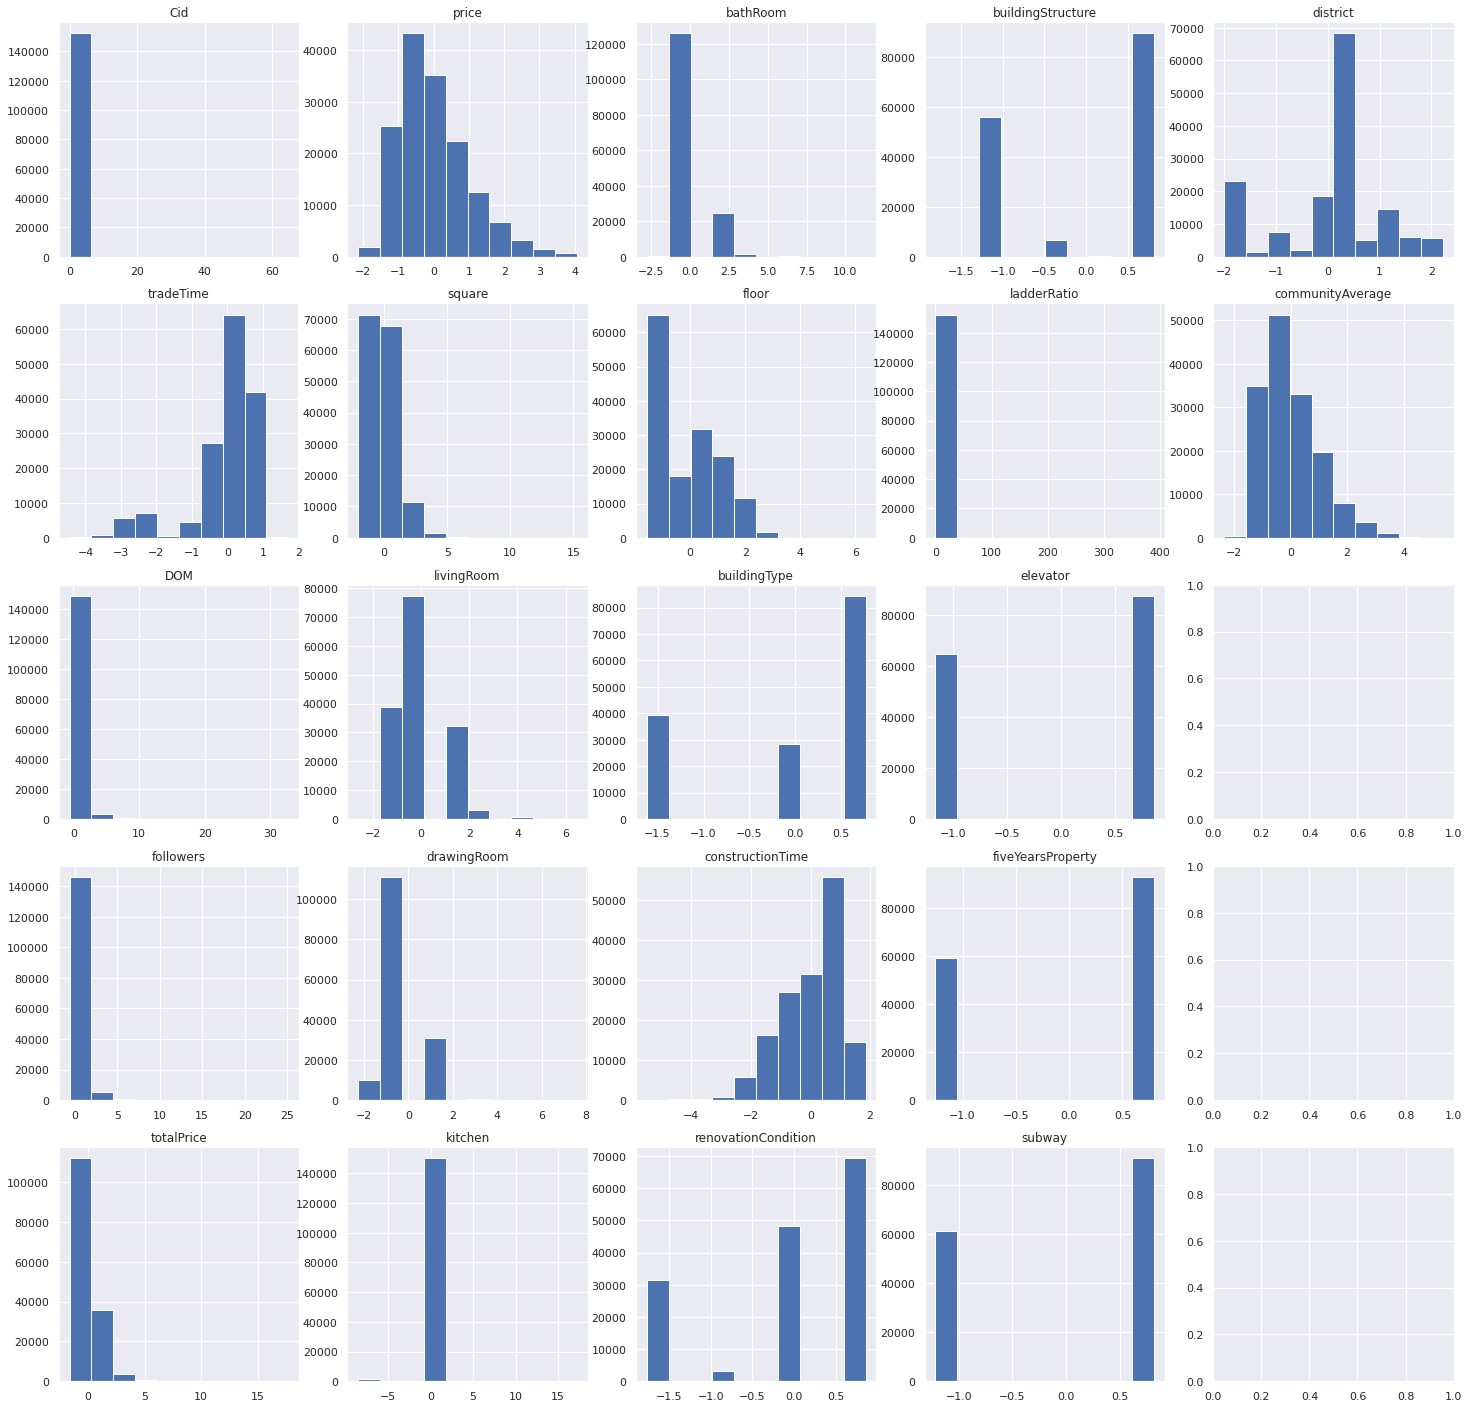

In [ ]:
import math
seaborn.set_theme(style='darkgrid')
def viz_numerical_data(data):
    num_data_cols = data.describe().columns
    num_of_cols = 5
    num_of_rows = int(math.ceil(num_data_cols.size/num_of_cols))
    fig, axs = plt.subplots(num_of_rows, num_of_cols, figsize=(num_of_cols*5, num_of_rows*5))
    fig_row = -1

    for i, col in enumerate(num_data_cols):
        if i%num_of_rows == 0:
            fig_row += 1
        axs[i%num_of_rows, fig_row].hist(data[col])
        axs[i%num_of_rows, fig_row].title.set_text(col)
viz_numerical_data(dataset_2)

In [ ]:
np.array(dataset_2.tradeTime.value_counts())

array([11728,  9926,  8736,  8306,  7266,  5820,  4805,  4741,  4252,
        3934,  3582,  3475,  3434,  3244,  3121,  2958,  2693,  2679,
        2657,  2596,  2590,  2536,  2500,  2477,  2448,  2422,  2369,
        2287,  2247,  2239,  1987,  1960,  1686,  1523,  1504,  1399,
        1086,  1031,   935,   869,   849,   727,   605,   575,   515,
         498,   497,   481,   471,   471,   466,   447,   447,   426,
         406,   403,   400,   386,   376,   375,   357,   350,   317,
         298,   288,   282,   266,   248,   247,   225,   219,   213,
         202,   188,   175,   128,   125,    34,    32,    30,    24,
          18,    15,    14,    14,    14,    14,    12,     9,     9,
           7,     6,     6,     5,     4,     1,     1])

In [ ]:
values = dataset_2['tradeTime'].value_counts(dropna=False).keys().tolist()
counts = dataset_2['tradeTime'].value_counts(dropna=False).tolist()
value_dict = dict(zip(values, counts))

In [ ]:
value_dict

{0.23029360056141804: 11728,
 0.23799795533620055: 9926,
 0.22258924578663553: 8736,
 0.9622073041657561: 8306,
 0.9545029493909736: 7266,
 0.26111101966054806: 5820,
 0.21488489101185304: 4805,
 0.1917718266875055: 4741,
 0.9467985946161911: 4252,
 0.2534066648857656: 3934,
 0.1763631171379405: 3582,
 -0.5093244578177025: 3475,
 1.0315464971387986: 3434,
 0.24570231011098306: 3244,
 1.008433432814451: 3121,
 1.023842142364016: 2958,
 -0.5709592960159625: 2693,
 -0.56325494124118: 2679,
 0.18406747191272302: 2657,
 -0.517028812592485: 2596,
 1.0161377875892337: 2590,
 1.0007290780396687: 2536,
 -0.5555505864663975: 2500,
 0.20718053623707053: 2477,
 0.19947618146228802: 2448,
 -0.5401418769168325: 2422,
 0.9930247232648861: 2369,
 -0.578663650790745: 2287,
 -0.5247331673672675: 2247,
 -0.5478462316916151: 2239,
 0.9699116589405385: 1987,
 -0.53243752214205: 1960,
 0.9853203684901036: 1686,
 -2.119534605747246: 1523,
 0.977616013715321: 1504,
 -0.5940723603403101: 1399,
 -2.820630890252

In [ ]:
append=dataset_2[dataset_2['tradeTime'] == -4.40772797385765]

In [ ]:
del value_dict[-4.40772797385765]

In [ ]:
for pack in value_dict:
  if value_dict[pack] < 100:
    append=np.vstack((append, dataset_2[dataset_2['tradeTime'] == pack]))
  else:
    append=np.vstack((append, dataset_2[dataset_2['tradeTime'] == pack].sample(n=20)))

In [ ]:
dataset_2=pd.DataFrame(append,columns=col_value_1)

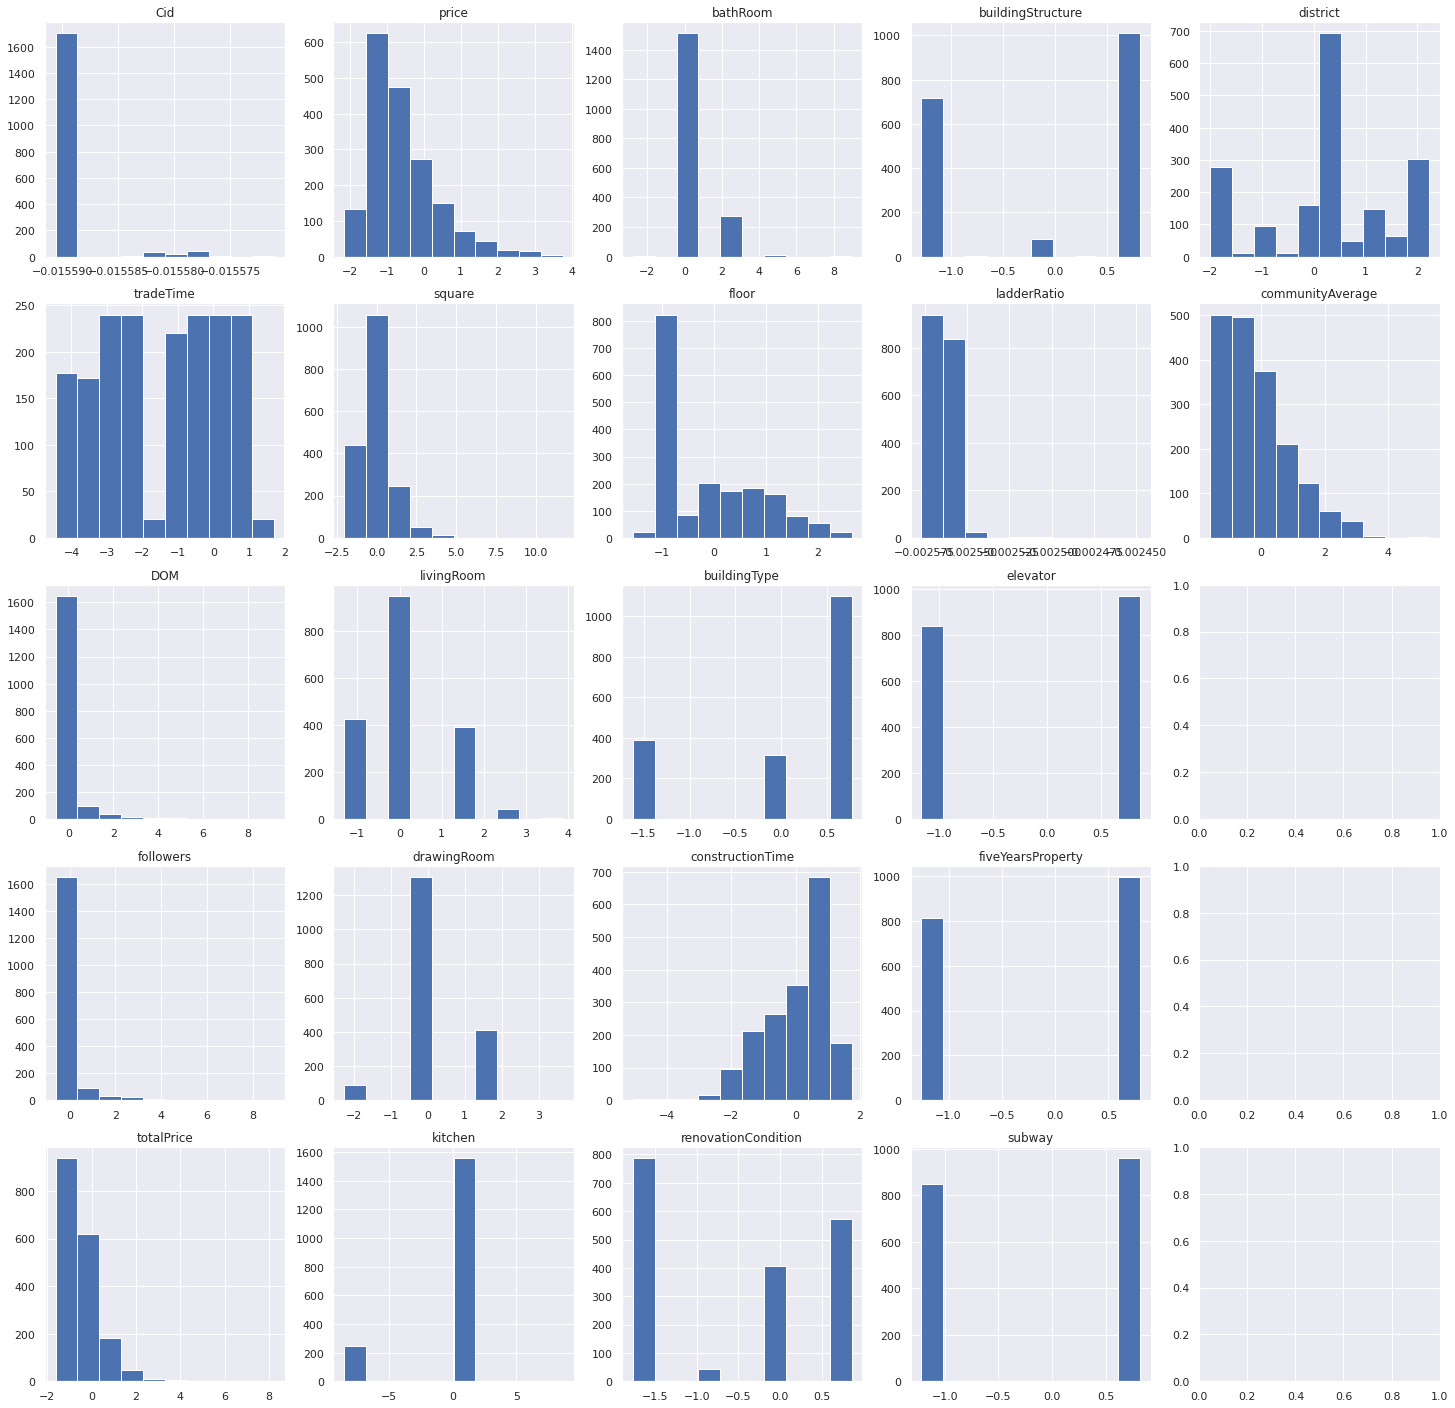

In [ ]:
viz_numerical_data(dataset_2)

In [ ]:
dataset_2.at[len(dataset_2.index)-1,'tradeTime']

-4.415432328632432

In [ ]:
dataset_2.to_csv('/content/drive/MyDrive/after_downsampling.csv')

#PLS&MLR part

In [ ]:
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error

In [ ]:
dataset_3=pd.read_csv('/content/drive/MyDrive/after_downsampling.csv',index_col=0)

In [ ]:
col_value_1

array(['Cid', 'tradeTime', 'DOM', 'followers', 'totalPrice', 'price',
       'square', 'livingRoom', 'drawingRoom', 'kitchen', 'bathRoom',
       'floor', 'buildingType', 'constructionTime', 'renovationCondition',
       'buildingStructure', 'ladderRatio', 'elevator',
       'fiveYearsProperty', 'subway', 'district', 'communityAverage'],
      dtype=object)

In [ ]:
col_value_1 = np.delete(col_value_1, [1])

In [ ]:
col_value_1

array(['Cid', 'DOM', 'followers', 'totalPrice', 'price', 'square',
       'livingRoom', 'drawingRoom', 'kitchen', 'bathRoom', 'floor',
       'buildingType', 'constructionTime', 'renovationCondition',
       'buildingStructure', 'ladderRatio', 'elevator',
       'fiveYearsProperty', 'subway', 'district', 'communityAverage'],
      dtype=object)

[0.11716614232108746, 0.06418651073781248, 0.03532296131758263, 0.020432969055546497, 0.013088614824280925, 0.009336526519244121, 0.005979826801809873, 0.0030745327003207008, 0.0009338436972852671, 0.00021485510605141964, 5.676118291141327e-05, 7.336954185235136e-06, 5.074842033431422e-07, 4.151823203095103e-08, 7.4418777678614496e-09, 1.434907108620294e-09, 1.2267478456957635e-10]
[0.8383265557087013, 0.911202875277579, 0.9517444076288853, 0.9714185911372974, 0.9817792053525624, 0.986850414299179, 0.9915439842921184, 0.9956391982962416, 0.9986651638221191, 0.9996966067042125, 0.999917972505172, 0.999989176280018, 0.99999924750226, 0.9999999397632784, 0.9999999892415582, 0.999999997910606, 0.9999999998234378]


Text(0.5, 1.0, 'price')

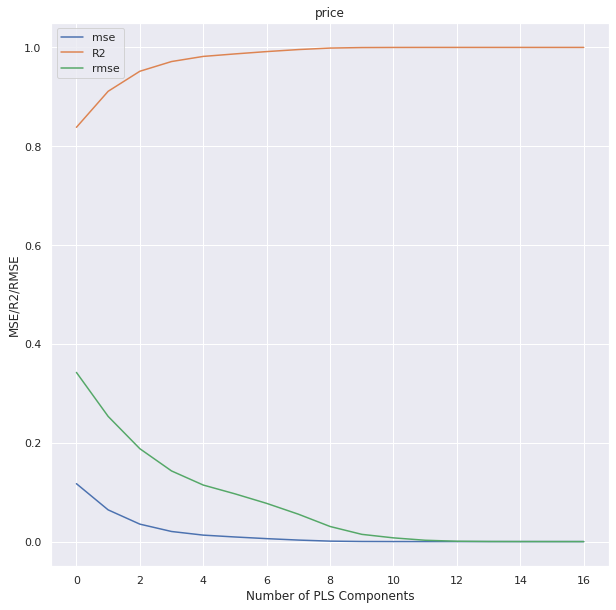

In [ ]:
X = dataset_3[col_value_1]
y = dataset_3[['totalPrice']]

#define cross-validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

mse = []
R2 = []
n = len(X)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 18):
    pls = PLSRegression(n_components=i)
    score = -1*model_selection.cross_val_score(pls, X, y, cv=cv,
               scoring='neg_mean_squared_error').mean()
    score_1 = model_selection.cross_val_score(pls, X, y, cv=cv,
               scoring='r2').mean()
    mse.append(score)
    R2.append(score_1)
print(mse)
print(R2)
#plot test MSE vs. number of components
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.plot(mse)
plt.plot(R2)
plt.plot(np.sqrt(mse))
plt.legend(['mse','R2','rmse'],loc='upper left')
plt.xlabel('Number of PLS Components')
plt.ylabel('MSE/R2/RMSE')
plt.title('price')

In [ ]:
#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

#calculate RMSE
pls = PLSRegression(n_components=10)
pls.fit(X_train, y_train)
print('R^2 with PLSRegression is: ', pls.score(X_test, y_test))
print('MSE with PLSRegression is: ',mean_squared_error(y_test, pls.predict(X_test)))
print('RMSE with PLSRegression is: ',np.sqrt(mean_squared_error(y_test, pls.predict(X_test))))

R^2 with PLSRegression is:  0.9998025427769873
MSE with PLSRegression is:  0.0001323790702418175
RMSE with PLSRegression is:  0.011505610381106146


In [ ]:
pls = PLSRegression(n_components=6)
pls.fit(X_train, y_train)
print('R^2 with PLSRegression is: ', pls.score(X_test, y_test))
print('MSE with PLSRegression is: ',mean_squared_error(y_test, pls.predict(X_test)))
print('RMSE with PLSRegression is: ',np.sqrt(mean_squared_error(y_test, pls.predict(X_test))))

R^2 with PLSRegression is:  0.9889918178213057
MSE with PLSRegression is:  0.007380094278822125
RMSE with PLSRegression is:  0.0859074751044525


In [ ]:
pls = PLSRegression(n_components=7)
pls.fit(X_train, y_train)
print('R^2 with PLSRegression is: ', pls.score(X_test, y_test))
print('MSE with PLSRegression is: ',mean_squared_error(y_test, pls.predict(X_test)))
print('RMSE with PLSRegression is: ',np.sqrt(mean_squared_error(y_test, pls.predict(X_test))))

R^2 with PLSRegression is:  0.9931259446589001
MSE with PLSRegression is:  0.0046084971770675685
RMSE with PLSRegression is:  0.06788591295009273


In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
X_1 = dataset_3[col_value_1]
y_1 = dataset_3[['totalPrice']]
lm_1 = LinearRegression()
#model_1 = lm_1.fit(X_1,y_1)

cv_1 = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

mse_1 = []
R2_1 = []
n_1 = n

# Calculate MSE using cross-validation, adding one component at a time
score_2 = -1*model_selection.cross_val_score(lm_1, X_1, y_1, cv=cv_1,
               scoring='neg_mean_squared_error').mean()
mse_1.append(score_2)

score_3 = model_selection.cross_val_score(lm_1, X_1, y_1, cv=cv_1,
               scoring='r2').mean()
R2_1.append(score_3)

print('R2 with linear regression is:', R2_1[0])
print('MSE with linear regression is:', mse_1[0])
print('RMSE with linear regression is:', np.sqrt(mse_1)[0])

R2 with linear regression is: 1.0
MSE with linear regression is: 1.5524423357615768e-30
RMSE with linear regression is: 1.2459704393610536e-15


In [ ]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X_1,y_1,test_size=0.3,random_state=0) 

#calculate MSE and RMSE
lg = LinearRegression()
lg.fit(X1_train, y1_train)

#np.sqrt(mean_squared_error(y1_test, lg.predict(X1_test)))
print('R2 with linear regression is:', lg.score(X1_test,y1_test))
print('MSE with linear regression is:', mean_squared_error(y1_test, lg.predict(X1_test)))
print('RMSE with linear regression is:', np.sqrt(mean_squared_error(y1_test, lg.predict(X1_test))))

R2 with linear regression is: 1.0
MSE with linear regression is: 1.650159159495275e-30
RMSE with linear regression is: 1.2845852091221022e-15


#RF part

In [ ]:
from sklearn.svm import SVR
import sklearn.model_selection as ms
from sklearn.ensemble import RandomForestRegressor

rf_params = [{
    'max_depth': [25], #15, 25, 30, 35, 40
    'n_estimators': [140], #120, 130, 140, 150
    'max_features': [12], #6, 8, 10, 12
}]

models = {
    'RF': ms.GridSearchCV(RandomForestRegressor(random_state=1), rf_params, cv=3),
}

def fit_models(xtrain,ytrain):
    mfit = {model: models[model].fit(xtrain, ytrain) for model in models.keys()}
    b_params = {model: models[model].best_params_ for model in models.keys()}
    print(b_params)
    b_score = {model: models[model].best_score_ for model in models.keys()}
    print(b_score)

answer = pd.DataFrame()
def derive_positions(x_test):
    for model in models.keys():
        answer['pre'+model] = models[model].predict(x_test)

x = dataset_3[col_value_1]
y = dataset_3[['totalPrice']]
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
fit_models(x_train,y_train)
derive_positions(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d a

{'RF': {'max_depth': 25, 'max_features': 12, 'n_estimators': 140}}
{'RF': 0.8806725233876023}


In [ ]:
effect = pd.DataFrame(columns = ['model','MSE','RMSE','R2'])
i = 0
for k,v in models.items():
    y_predict = answer['pre'+k]
    MSE = mean_squared_error(y_test,y_predict)
    RMSE = np.sqrt(mean_squared_error(y_test,y_predict))  
    R2 = r2_score(y_test,y_predict)
    effect.loc[i] = [k,MSE,RMSE,R2]
    i += 1
    print(f"MSE:{MSE}RMSE:{RMSE}R2:{R2}")
effect

MSE:0.009806570243592206RMSE:0.09902812854735873R2:0.9879482324798816


,model,MSE,RMSE,R2
0,RF,0.009807,0.099028,0.987948
